<a href="https://colab.research.google.com/github/shofiaayuu/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : SHOFIATUL AYU ANIKANINGRUM

KELAS : TI - 3F

ABSEN : 29

PERTEMUAN 6

# MODUL 6 – Histogram, Histogram Equalization, Dithering

## TUGAS PRAKTIKUM
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

  Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [44]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [47]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

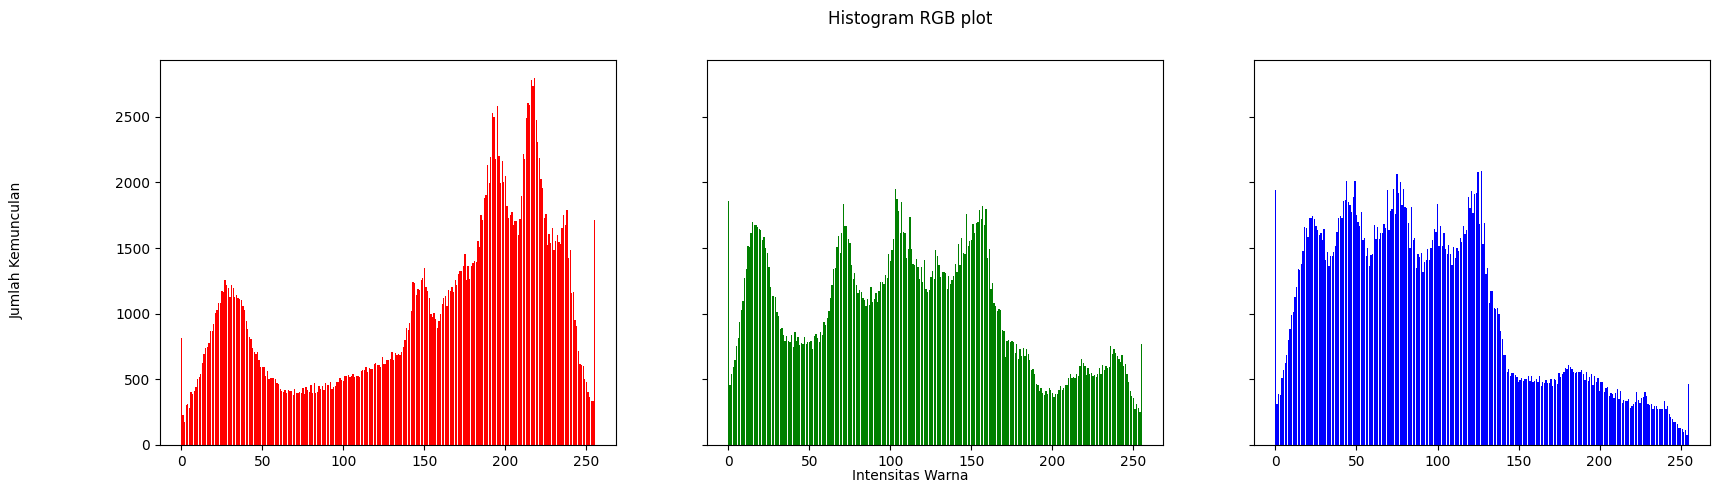

In [48]:
# Membaca gambar 'lena.jpg' dari Google Drive
img_1 = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/lena.jpg')

# Mengubah format warna gambar dari BGR ke RGB
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Mendapatkan dimensi gambar (tinggi, lebar, kedalaman warna)
height, width, depth = np.shape(img_1)

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Membuat array kosong untuk menghitung histogram warna biru, hijau, dan merah
blue = [0]*256
green = [0]*256
red = [0]*256

# Loop melalui setiap piksel gambar dan menghitung frekuensi warna
for y in range(0, height):
    for x in range(0, width):
        blue[img_1[y][x][0]] += 1
        green[img_1[y][x][1]] += 1
        red[img_1[y][x][2]] += 1

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Membuat plot histogram untuk intensitas warna merah, hijau, dan biru
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

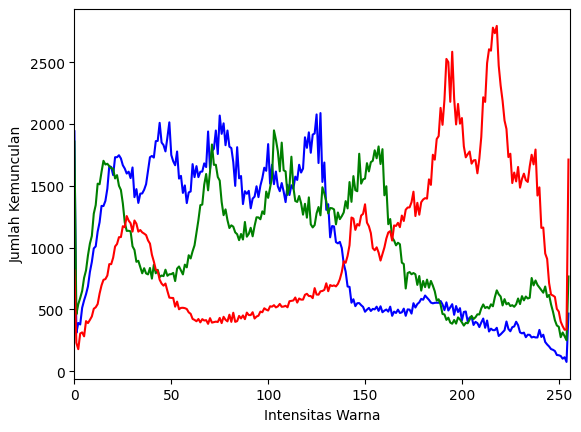

In [49]:
# Menentukan daftar warna dan ID saluran (channel) (0 = biru, 1 = hijau, 2 = merah)
colors = ("b", "g", "r")
channel_ids = (0, 1, 2)

# Membatasi sumbu x plot ke rentang 0 hingga 255
plt.xlim([0, 256])

# Loop melalui saluran (channel) warna (biru, hijau, merah)
for channel_id, c in zip(channel_ids, colors):
    # Menghitung histogram untuk saluran warna tertentu
    histogram, bin_edges = np.histogram(
        img_1[:, :, channel_id], bins=256, range=(0, 256)
    )

    # Plot histogram menggunakan warna yang sesuai
    plt.plot(bin_edges[0:-1], histogram, color=c)

# Menambahkan label sumbu x dan y ke plot
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

# Menampilkan plot histogram
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

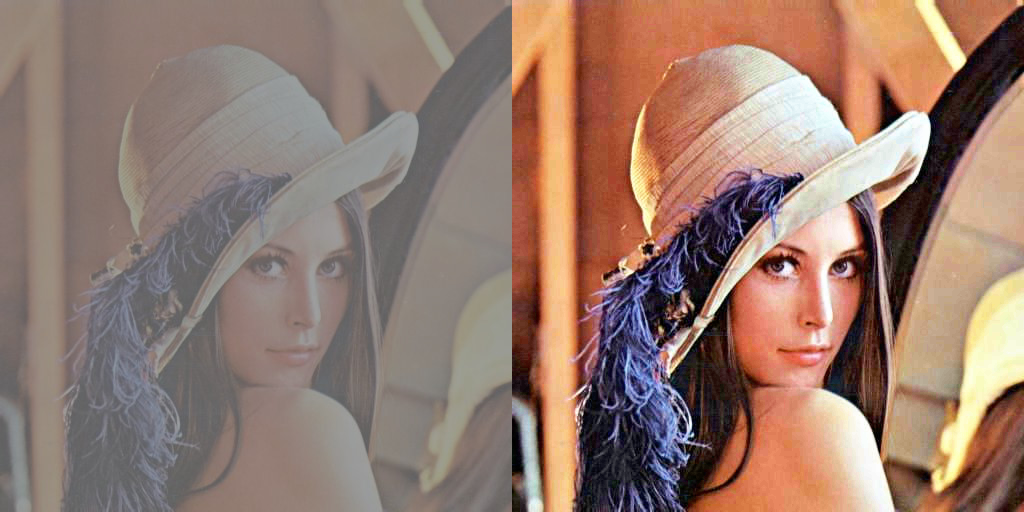

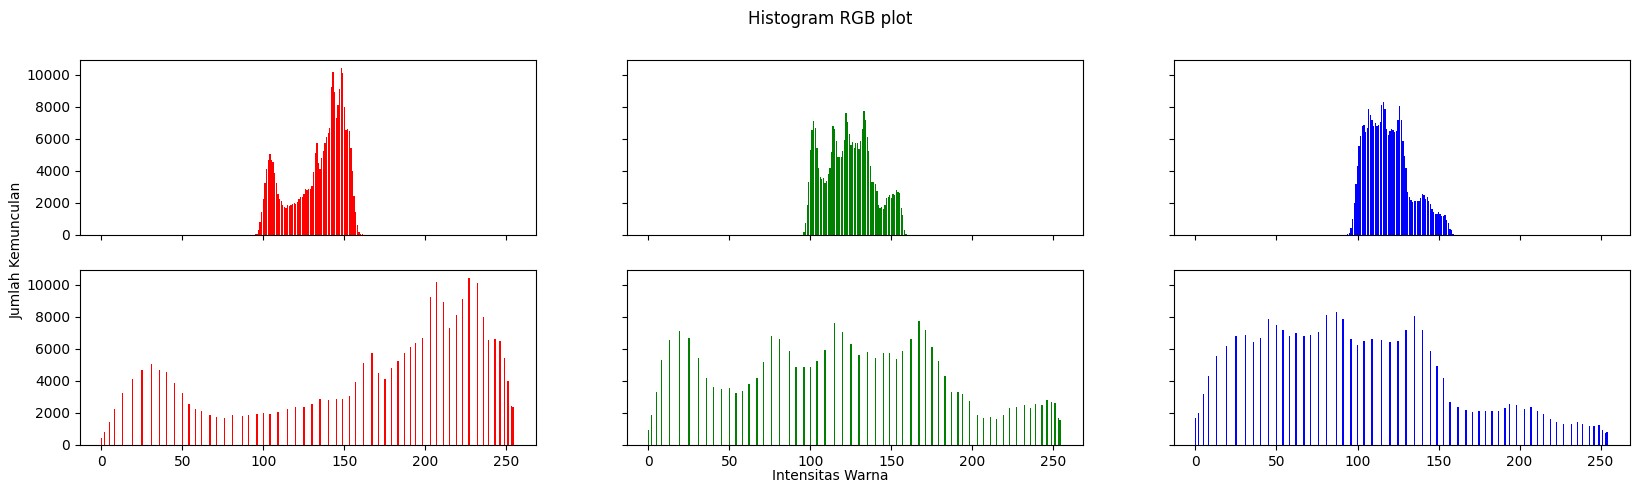

In [57]:
# Membaca gambar 'lena_lc.jpg' dari Google Drive
img1 = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/lena_lc.jpg')

# Fungsi untuk menghitung histogram gambar
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Menghitung histogram gambar asli
histo_asli = histog(img1)

# Mengonversi gambar menjadi array Numpy
img_array = np.asarray(img1)

# Meratakan array gambar dan menghitung histogram dengan pembagian bin
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Histogram kumulatif yang dinormalisasi
chistogram_array = np.cumsum(histogram_array)

# Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Transformasi
# Meratakan array gambar menjadi daftar
img_list = list(img_array.flatten())

# Mengubah nilai piksel sesuai dengan pemetaan
eq_img_list = [transform_map[p] for p in img_list]

# Mengembalikan bentuk asli dan menulis kembali ke img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Menghitung histogram gambar hasil ekualisasi
equal_histo = histog(img2)

# Menggabungkan gambar asli dan gambar hasil ekualisasi
final_frame = cv.hconcat((img1, img2))

# Menampilkan gambar
cv2_imshow(final_frame)

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Memeriksa apakah gambar adalah gambar grayscale
isgrayimg = np.array_equal(histo_asli[0], histo_asli[1]) and np.array_equal(histo_asli[1], histo_asli[2])

# Menampilkan plot histogram sesuai dengan jenis gambar (grayscale atau warna)
if not isgrayimg:
    # Gambar berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    # Gambar grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

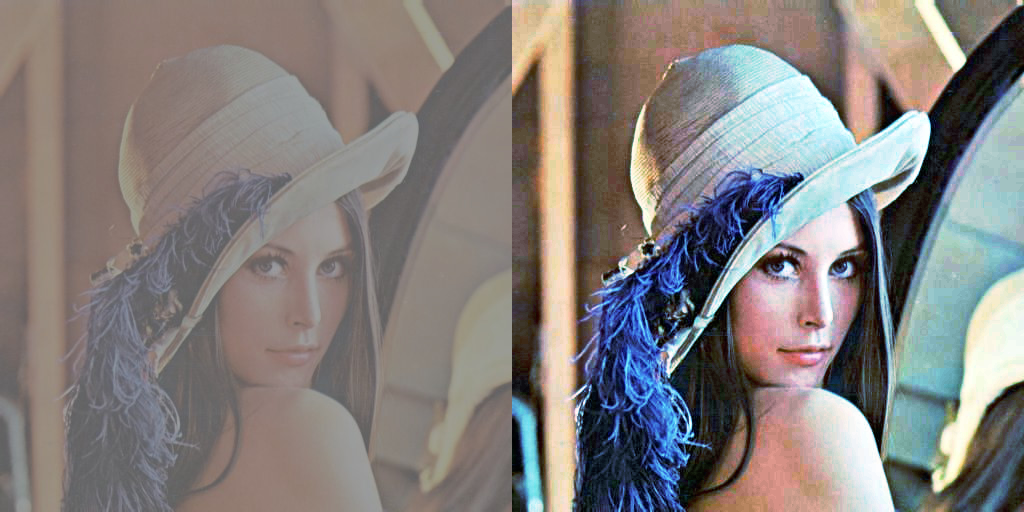

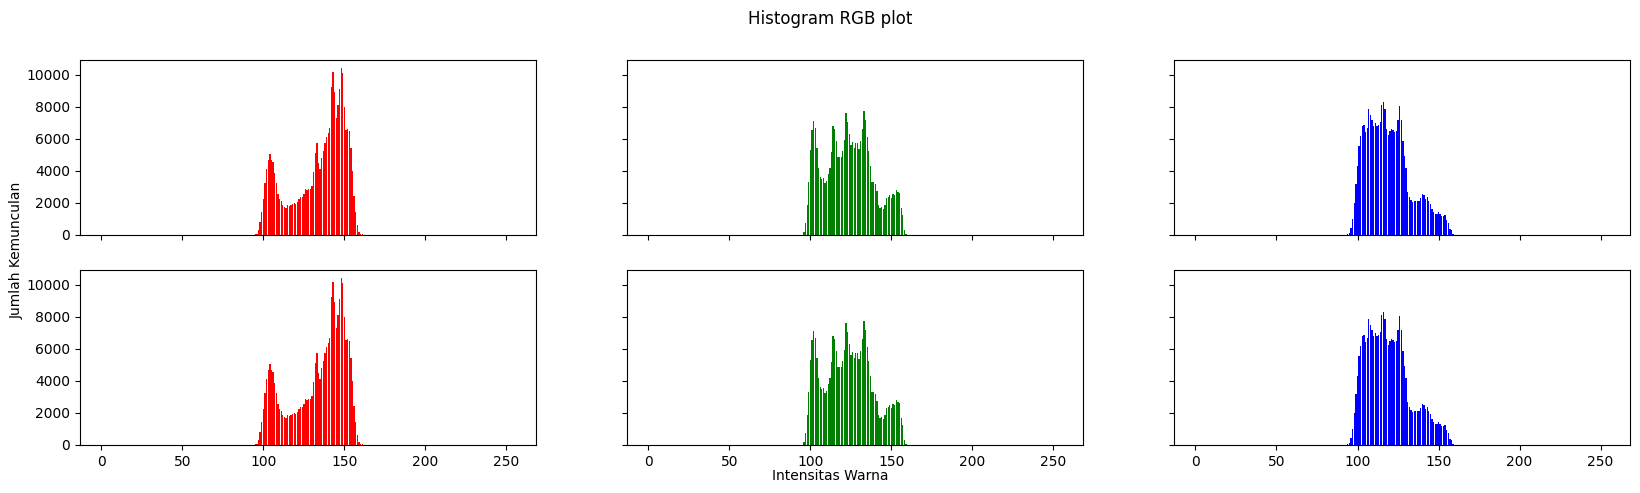

In [60]:
# Memisahkan saluran warna (channel) dari gambar 'img1' menjadi saluran merah, hijau, dan biru.
channels = cv.split(img1)

# Membuat daftar kosong 'eq_channels' untuk menyimpan saluran yang telah di-equalize.
eq_channels = []

# Loop melalui saluran dan warna
for ch, color in zip(channels, ["r", "g", "b"]):
    # Melakukan equalization histogram
    eq_channels.append(cv.equalizeHist(ch))

# Menggabungkan kembali saluran yang telah di-equalize
eq_image = cv.merge(eq_channels)

# Menghitung histogram dari gambar equalized.
equal_histo = histog(eq_image)

# Menggabungkan gambar asli dan gambar equalized secara horizontal.
final_frame = cv.hconcat((img1, eq_image))

cv2_imshow(final_frame)

# Membuat larik 'names' yang berisi nilai dari 0 hingga 255.
names = np.arange(256)

# Memeriksa apakah gambar grayscale atau tidak dengan membandingkan saluran warna merah, hijau, dan biru.
isgraying = np.array_equal(blue, green, red)

# Jika gambar bukan grayscale:
if (isgraying == False):
    # Membuat plot histogram RGB dengan 2 baris dan 3 kolom.
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')  # Menambahkan judul keseluruhan plot.
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')  # Label sumbu Y.
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')  # Label sumbu X.

    # Menampilkan histogram untuk saluran merah, hijau, dan biru pada dua baris pertama.
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')

    # Menampilkan histogram kembali untuk saluran merah, hijau, dan biru pada dua baris kedua.
    axs[1, 0].bar(names, histo_asli[2], color='red')
    axs[1, 1].bar(names, histo_asli[1], color='green')
    axs[1, 2].bar(names, histo_asli[0], color='blue')
else:
    # Jika gambar adalah grayscale, maka hanya ada dua kolom dalam plot histogram.
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')  # Label sumbu Y.
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')  # Label sumbu X.

    # Menampilkan histogram untuk gambar grayscale pada kolom pertama.
    axs[0, 0].bar(names, histo_asli[2], color='gray')

    # Menampilkan histogram untuk gambar grayscale yang telah di-equalize pada kolom kedua.
    axs[0, 1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

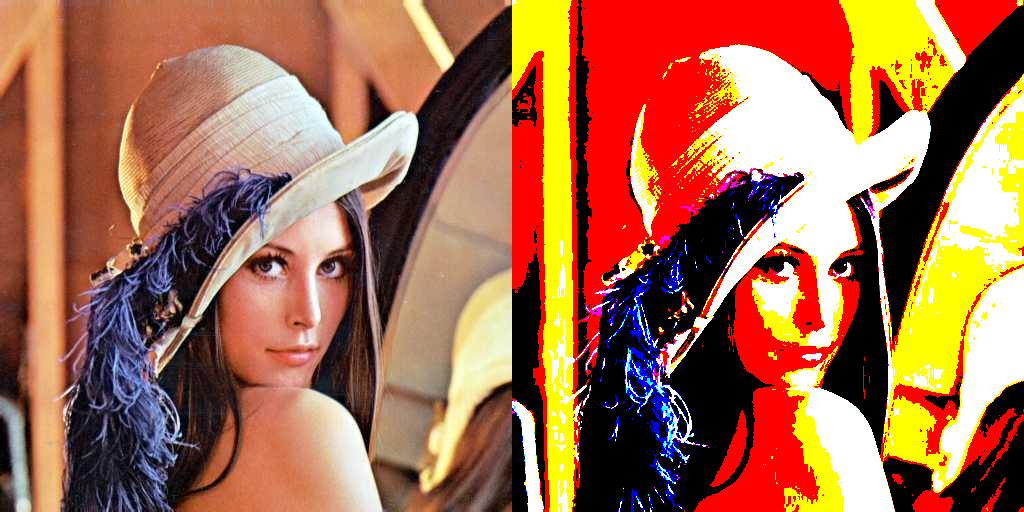

In [59]:
# Fungsi 'warnaTerdekat' digunakan untuk mencari warna terdekat dalam palet warna yang diberikan.
def warnaTerdekat(r, g, b):
    pValue = 0
    minDistance = 255*255 + 255*255 + 255*255 + 1  # Inisialisasi jarak minimum dengan nilai maksimum.
    warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]  # Palet warna yang tersedia.

    # Iterasi melalui semua warna dalam palet.
    for i in range(len(warnaPallette)):
        rDiff = r - warnaPallette[i][0]
        gDiff = g - warnaPallette[i][1]
        bDiff = b - warnaPallette[i][2]

        # Menghitung jarak Euclidean antara warna yang diberikan dan warna dalam palet.
        distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff

        # Jika jarak yang dihitung lebih kecil dari jarak minimum yang saat ini ditemukan,
        # perbarui nilai jarak minimum dan indeks warna terdekat (pValue).
        if distance < minDistance:
            minDistance = distance
            pValue = i

    return pValue

# Palet warna yang tersedia.
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

# Mengubah format warna gambar 'img_1' dari BGR ke RGB.
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Membuat gambar kosong dengan format yang sama seperti 'img_16'.
img_8 = np.zeros(img_16.shape, img_16.dtype)

# Iterasi melalui setiap piksel dalam gambar 'img_16'.
for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        # Mencari warna terdekat dari palet untuk setiap piksel dan menggantinya dalam gambar 'img_8'.
        baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = warnaPallette[baru]

# Mengembalikan gambar 'img_16' ke format BGR dan 'img_8' ke format RGB.
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

# Menggabungkan gambar 'img_16' dan 'img_8' secara horizontal.
final_frame = cv.hconcat((img_16, img_8))

# Menampilkan gambar final yang berisi gambar asli dan gambar dengan palet warna terdekat.
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut(tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

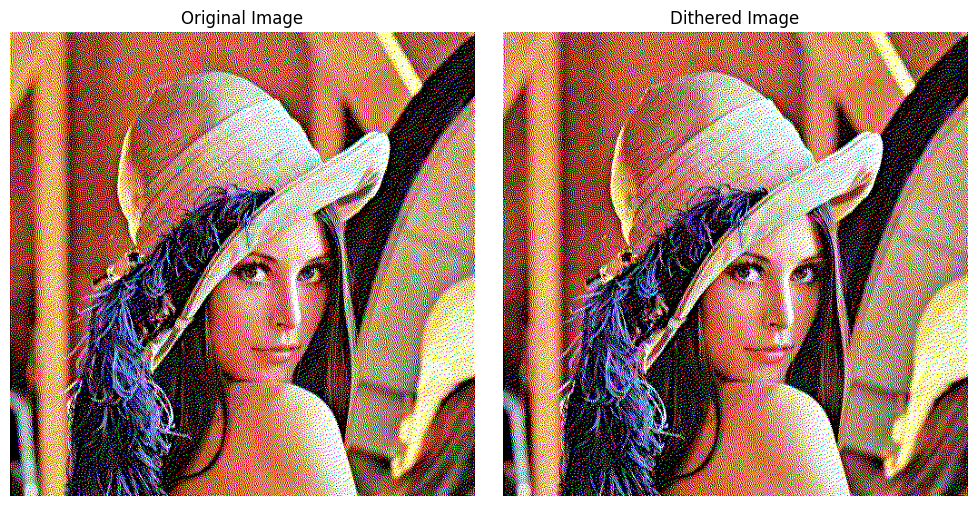

In [66]:
# Mengimpor modul yang diperlukan
from PIL import Image
import matplotlib.pyplot as plt

# Fungsi ini mengaplikasikan dithering pada gambar yang diberikan
def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)  # Mendistribusikan kesalahan kuantisasi
    return image

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error

    # Mendistribusikan kesalahan kuantisasi sesuai dengan algoritma Floyd-Steinberg
    if x + 1 < width:
        distribute_pixel(image, x + 1, y, error_r * 7 / 16, error_g * 7 / 16, error_b * 7 / 16)
    if x - 1 >= 0 and y + 1 < height:
        distribute_pixel(image, x - 1, y + 1, error_r * 3 / 16, error_g * 3 / 16, error_b * 3 / 16)
    if y + 1 < height:
        distribute_pixel(image, x, y + 1, error_r * 5 / 16, error_g * 5 / 16, error_b * 5 / 16)
    if x + 1 < width and y + 1 < height:
        distribute_pixel(image, x + 1, y + 1, error_r * 1 / 16, error_g * 1 / 16, error_b * 1 / 16)

def distribute_pixel(image, x, y, error_r, error_g, error_b):
    pixel = image.getpixel((x, y))
    new_pixel = (
        int(max(0, min(255, pixel[0] + error_r))),
        int(max(0, min(255, pixel[1] + error_g))),
        int(max(0, min(255, pixel[2] + error_b)))
    )
    image.putpixel((x, y), new_pixel)


# Mengunggah gambar input asli
input_image_path = "/content/drive/MyDrive/PCVK_2023/Images/lena.jpg"
input_image = Image.open(input_image_path)

# Memproses gambar dengan menerapkan dithering
output_image = apply_dithering(input_image)

# Membuat tampilan gambar menggunakan Matplotlib
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

# Menampilkan gambar hasil dithering
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Menampilkan gambar-gambar tersebut
plt.tight_layout()
plt.show()

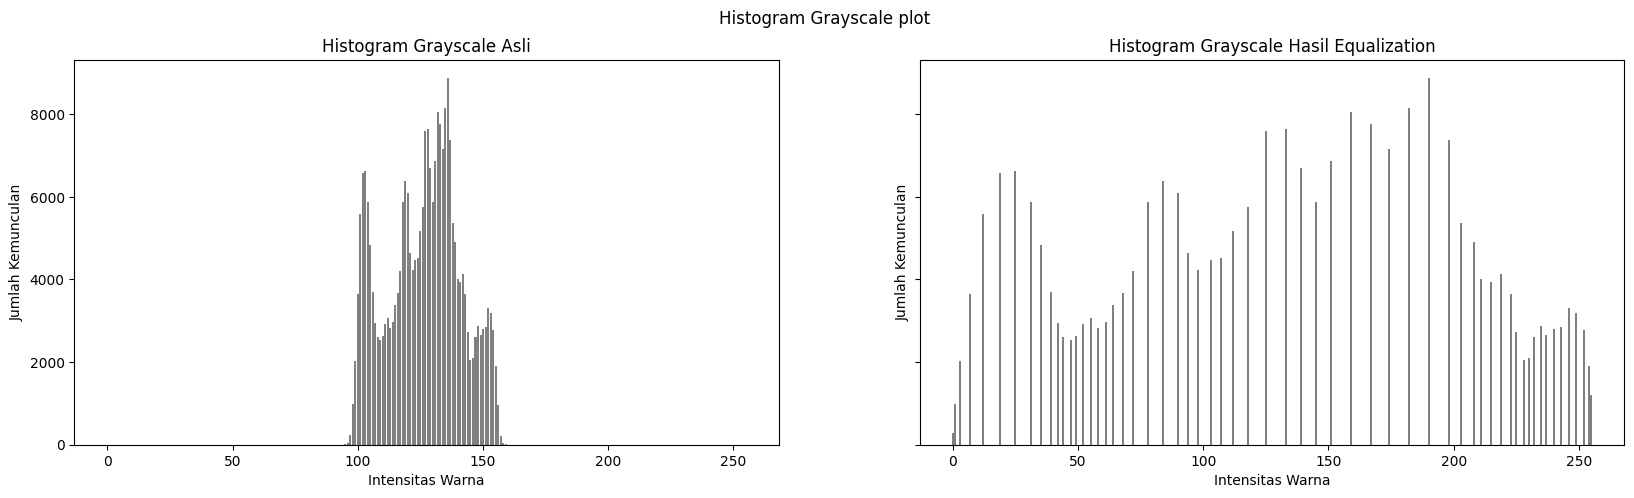

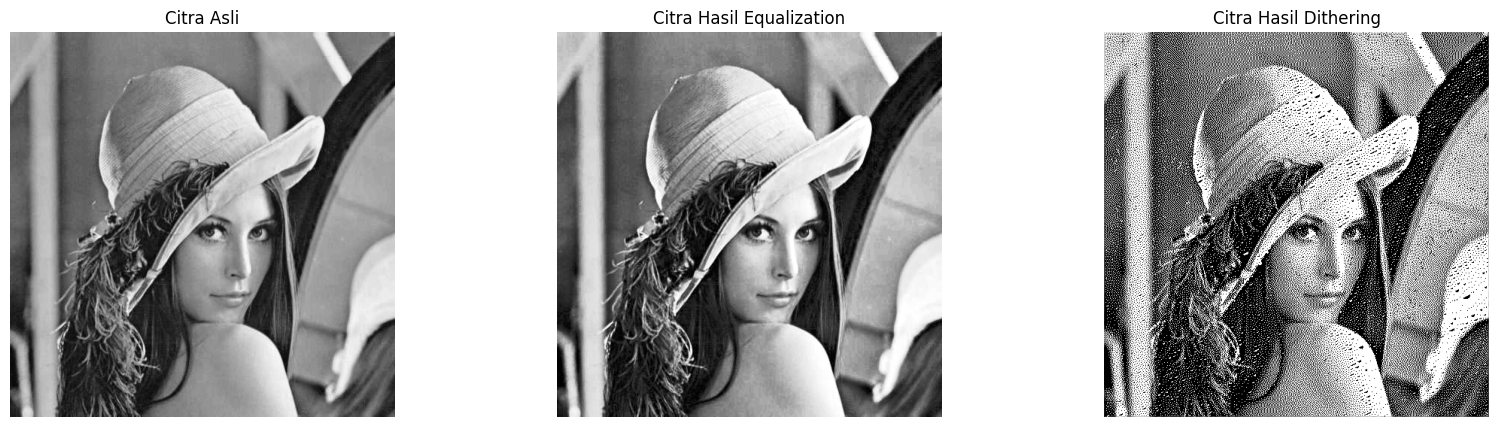

In [73]:
# Baca citra asli
image = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 255 if old_pixel >= 128 else 0
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 7 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 3 / 16
        dithered_image[y + 1, x] += quantization_error * 5 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 1 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot', y=0.98)  # Menentukan letak judul di atas plot

# Tampilkan histogram grayscale asli
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[0].set_title('Histogram Grayscale Asli')
axs[0].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')

# Tampilkan histogram grayscale hasil equalization
axs[1].bar(range(256), histo_equalized[:,0], color='gray')
axs[1].set_title('Histogram Grayscale Hasil Equalization')
axs[1].set_xlabel('Intensitas Warna')
axs[1].set_ylabel('Jumlah Kemunculan')

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=[20, 5])

# Display the first image (Citra Asli)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Citra Asli')
axs[0].axis('off')

# Display the second image (Citra Hasil Equalization)
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Citra Hasil Equalization')
axs[1].axis('off')

# Display the third image (Citra Hasil Dithering)
axs[2].imshow(dithered_image, cmap='gray')
axs[2].set_title('Citra Hasil Dithering')
axs[2].axis('off')

plt.show()